## Assignment
-----------


1. Write a function that uses FFT to replicate the results of `freqz` (Hint: look at the length of w,h returned by `freqz`. Think why it is so)
2. Write a function to plot the phase response of the filter as well, along with amplitude response (using only FFT as the previous question).
3. The filtered signal is not free from the high frequency "noise". Why is this so? Can you change the filter design parameters to fix this? Justify your changes.

Importing necessary libraries:

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

Here, we define the sampling frequency, and create the noise-signal `x` for further analysis.

In [18]:
sampl_freq = 8 #HERE, THE SAMPLING RATE IS SIMPLY THE RATIO OF THE NUMBER OF SAMPLES TO THE SAMPLING TIME PERIOD/SIZE OF THAT INTERVAL
t = np.linspace(0,200*np.pi,int(200*np.pi*sampl_freq)) #THIS SHALL BE THE NUMBER OF DISCRETE TIME STEPS IN OUR SINUSOIDAL-SIGNAL, AS DEFINED BY THE SAMPLING FREQUENCY

slow_t_prd = 64 #THIS IS THE TIME PERIOD OF THE 'SLOW' WAVE
fast_t_prd = 8 #THIS IS THE TIME PERIOD OF THE 'FAST' WAVE

x = 10*np.sin(2*np.pi*t/slow_t_prd) + 4*np.sin(2*np.pi*t/fast_t_prd)  #THIS SHALL BE THE INPUT SIGNAL WITH TWO DIFFERENT TIME PERIODS AS WE HAVE DEFINED, A 'SLOW' AND 'FAST' TIME PERIOD
control = 10*np.sin(2*np.pi*(1/64)*t) #WE DEFINE A 'CONTROL' SIGNAL WHICH CORRESPONDS TO THE LOW FREQUENCY COMPONENT, TO CHECK IF THE FILTER RECOVERS IT

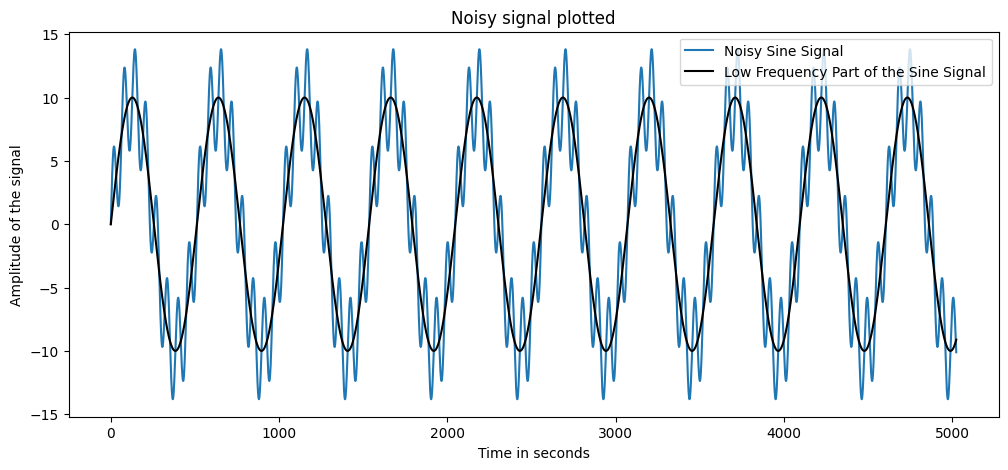

In [19]:
plt.figure(figsize=(12,5))
plt.plot(x, label = 'Noisy Sine Signal')
plt.plot(control, label = 'Low Frequency Part of the Sine Signal',c='k')
plt.title('Noisy signal plotted')
plt.ylabel('Amplitude of the signal')
plt.xlabel('Time in seconds')
plt.legend()
plt.show()

In [20]:
cutoff_time_period = 10
cutoff_frequency = 1/cutoff_time_period  #THIS IS THE FREQUENCY AT WHICH WE DEFINE A CUTOFF. IN OTHER WORDS, ALL FREQUENCIES ABOVE THIS IN THE SIGNAL ARE ATTENUATED/'DISCARDED'

numtaps = 81  #THIS PARAMETER THE NUMBER OF 'TAPS'/COEFFICIENTS IN OUR FINITE IMPULSE RESPONSE (FIR) FILTER 
# ESSENTIALLY, IT IS THE LENGTH OF THE FILTER (HOW MANY COEFFICIENTS WILL BE USED IN THE FILTER'S RESPONSE)

#THE 'ORDER' OF THE FILTER IS SIMPLY ORDER=NUMTAPS-1, AND IS THE LENGTH OF THE FILTER
#'HIGHER-ORDER' FILTERS CAN PROVIDE SHARPER CUTOFFS BUT REQUIRE MORE COMPUTATION, DUE TO MORE COEFFICIENTS BEING INVOLVED
coefficients = signal.firwin(numtaps, cutoff_frequency, window='blackman', pass_zero='lowpass',fs=sampl_freq) 
#CREATING THE FILTER USING THE MODULE scipy.firwin

filtered_data = signal.convolve(coefficients,x, mode = 'valid') 
#APPLYING THE FILTER BY MEANS OF CONVOLUTION
#'MODE' REFLECTS THE FACT THAT BOTH OUR SIGNALS ARE FINITE IN LENGTH

"""LOW PASS FILTER -> THINGS THAT ARE SLOWER THAN THE CUTOFF_TIME_PERIOD"""

"""YOU LOSE 40 SAMPLES ON BOTH SIDES FOR MODE='VALID', GIVEN THAT NUMTAPS=81"""

Implications of numtaps/order:
Higher numtaps/order means a smoother transition from passband to stopband (i.e., better frequency selectivity) but requires more computational resources.
Lower numtaps/order results in a filter with a faster response but less precision in cutting off frequencies, leading to more gradual transitions.

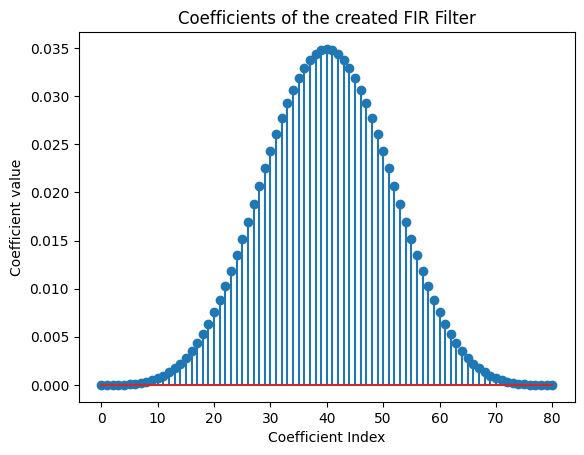

In [21]:
%matplotlib inline
plt.stem(coefficients) # THIS FUNCTION PLOTS THE VALUES OF THE COEFFICIENTS OF THE NEWLY CREATED FIR FILTER
plt.title('Coefficients of the created FIR Filter')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient value')
plt.show()

Convolution here is the process of applying the filter to the signal to remove unwanted frequencies (i.e., performing the actual filtering).

The plot is basically the filter's "impulse response".
The shape of this plot (bell-like) is typical for a low-pass filter because it smooths out high-frequency components while allowing low-frequency components to pass through relatively unaffected.

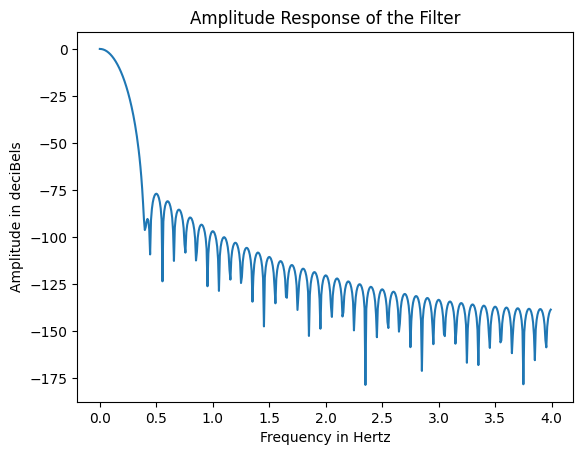

In [22]:
%matplotlib inline
w,h = signal.freqz(coefficients,fs = sampl_freq) 
#THIS FUNCTION CALCULATES THE AMPLITUDE RESPONSE OF THE FILTER, WHERE 
#w CONTAINS THE FREQUENCIES AT WHICH THE FREQUENCY RESPONSE IS EVALUATED, AND h CONTAINS THE FREQUENCY RESPONSE OF THE FILTER AT EACH FREQUENCY
plt.plot(w, 20*np.log10(abs(h))) #WE CONVERT THE AMPLITUDE INTO DECIBELS IMPLICITLY IN THE PLOTTING FUNCTION
plt.ylabel('Amplitude in deciBels')
plt.xlabel('Frequency in Hertz')
plt.title('Amplitude Response of the Filter')
plt.show()

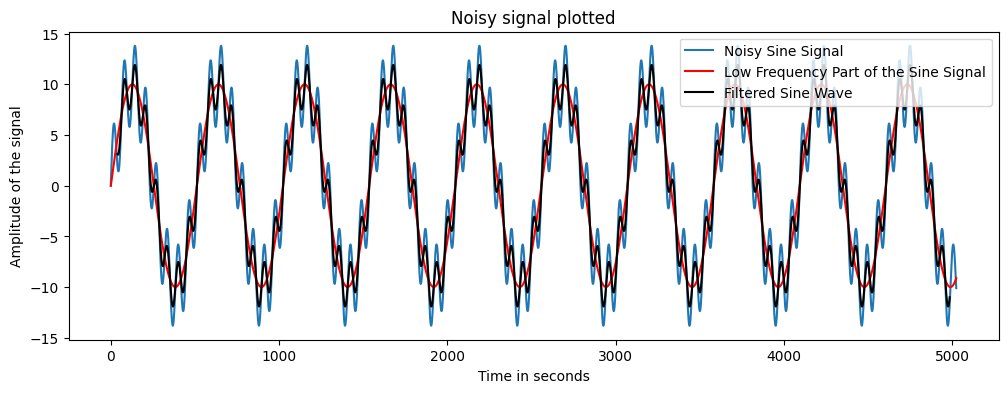

In [23]:
%matplotlib inline
plt.figure(figsize=(12,4))

lag = np.linspace((numtaps-1)/2, len(control)-((numtaps-1)/2), len(filtered_data)) 
#THIS IS A 'LAG' FUNCTION CREATED DUE TO THE USE OF THE VALID MODE WHEN PERFORMING THE CONVOLUTION
plt.plot(x,label='Noisy Sine Signal')
plt.plot(control,'r',label='Low Frequency Part of the Sine Signal')
plt.plot(lag,filtered_data,c='k', label ='Filtered Sine Wave')
plt.title('Noisy signal plotted')
plt.ylabel('Amplitude of the signal')
plt.xlabel('Time in seconds')
plt.legend()
plt.show()

In [24]:
#WE AGAIN FILTER THE SAME NOISY SINE SIGNAL USING THIS FILTER AS WE DID EARLIER ABOVE
fr = [0, 1/30, 1/10, sampl_freq/2] #THIS IS THE FREQUENCY ARRAY, WHICH MUST BEGIN WITH 0 AND END WITH F_sampl/2
gain = [1, 1, 0, 0] #THIS IS THE GAIN ARRAY CORRESPONDING TO THE FREQUENCY ARRAY, WHERE EACH VALUE MUST CORRESPONDI TO A VALUE IN THE FREQUENCY ARRAY (WITH THE SAME INDEX)
coefficients2 = signal.firwin2(numtaps, fr, gain, window='blackman', fs = sampl_freq) #THIS FUNCTION CREATES THE FILTER
filtered_data2 = signal.convolve(coefficients,x, mode = 'valid') #HERE WE APPLY THE NEWLY CREATED FILTER FUNCTION VIA MEANS OF A CONVOLUTION


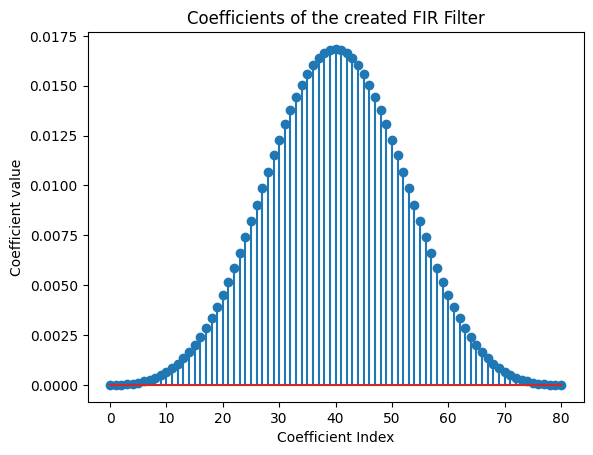

In [25]:
%matplotlib inline

plt.stem(coefficients2) # this plots the values of the coefficients of the FIR filter we created
plt.title('Coefficients of the created FIR Filter')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient value')
plt.show()

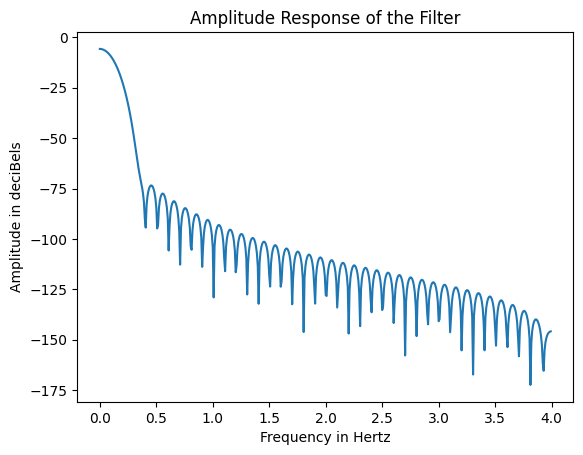

In [26]:
%matplotlib inline

w1,h1 = signal.freqz(coefficients2,fs = sampl_freq) ##THIS FUNCTION CALCULATES THE AMPLITUDE RESPONSE OF THE FILTER, WHERE #w CONTAINS THE FREQUENCIES AT WHICH THE FREQUENCY RESPONSE IS EVALUATED, AND h CONTAINS THE FREQUENCY RESPONSE OF THE FILTER AT EACH FREQUENCY
"""NOTE THAT f_s == 1 HERE"""
plt.plot(w1, 20*np.log10(abs(h1)))
plt.ylabel('Amplitude in deciBels')
plt.xlabel('Frequency in Hertz')
plt.title('Amplitude Response of the Filter')
plt.show()

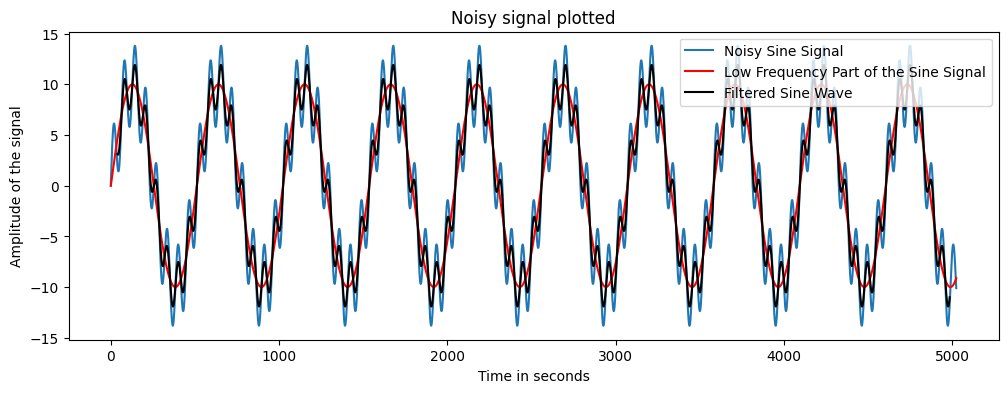

In [27]:
%matplotlib inline
plt.figure(figsize=(12,4))
lag2 = np.linspace((numtaps-1)/2,len(control)-((numtaps-1)/2),len(filtered_data2)) #THIS IS THE LAG CREATED DUE TO CONVOLUTION
plt.plot(x,label='Noisy Sine Signal')
plt.plot(control,'r',label='Low Frequency Part of the Sine Signal')
plt.plot(lag2,filtered_data2,'k', label ='Filtered Sine Wave')
plt.title('Noisy signal plotted')
plt.ylabel('Amplitude of the signal')
plt.xlabel('Time in seconds')
plt.legend()
plt.show()

Write a function that uses FFT to replicate the results of freqz.

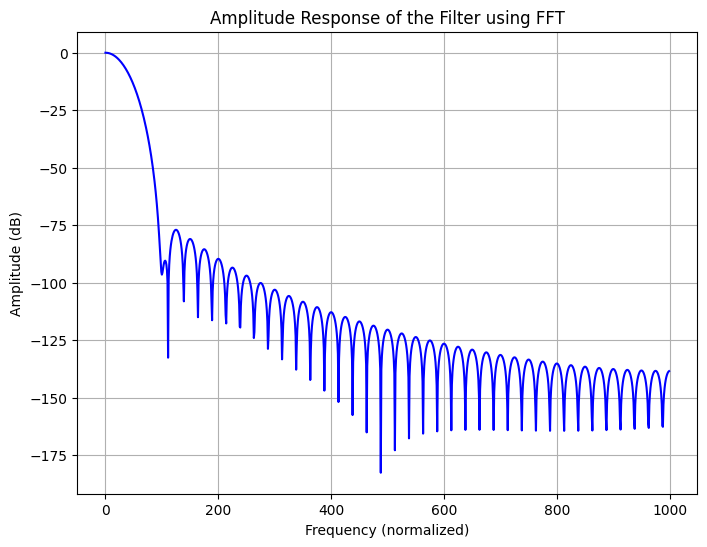

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def compute_fft_response(b, N=2000):
    impulse = np.zeros(N)
    impulse[0] = 1  #VALUE OF THE IMPULSE AT THE FIRST SAMPLE
    response = signal.lfilter(b, [1], impulse)  #APPLYING THE FIR FILTER
    h_fft = np.fft.fft(response, N)
    w_fft = np.fft.fftfreq(N, d=1/N)[:N // 2]
    h_fft = h_fft[:N // 2]
    return w_fft, h_fft

w_fft, h_fft = compute_fft_response(coefficients) #COMPUTING THE FFT AMPLITUDE AND FREQUENCY RESPONSE

#PLOTTING THE AMPLITUDE RESPONSE AGAINST THE FREQUENCIES
plt.figure(figsize=(8, 6))
amplitude = np.abs(h_fft)
plt.plot(w_fft, 20 * np.log10(amplitude), 'b')
plt.title('Amplitude Response of the Filter using FFT')
plt.xlabel('Frequency (normalized)')
plt.ylabel('Amplitude (dB)')
plt.grid()
plt.show()


Write a function to plot the phase response of the filter as well, along with amplitude response (using only FFT as the previous question).

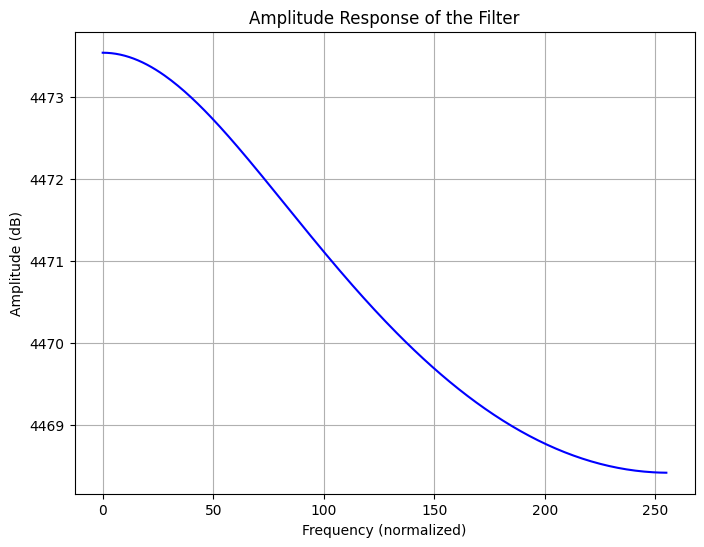

In [32]:
# COMPUTING THE FREQUENCY RESPONSE USING FFT
def compute_fft_response(b, a, N=512):
    impulse = np.zeros(N)
    impulse[0] = 1
    response = signal.lfilter(b, a, impulse)  #APPLYING THE FILTER TO THE IMPULSE
    h_fft = np.fft.fft(response, N)
    w_fft = np.fft.fftfreq(N, d=1/N)[:N // 2]
    h_fft = h_fft[:N // 2] 
    return w_fft, h_fft

# SINGLE PLOT FOR AMPLITUDE RESPONSE
def plot_amplitude_response(b, a):
    w_fft, h_fft = compute_fft_response(b, a)
    amplitude = np.abs(h_fft)

    plt.figure(figsize=(8, 6))
    plt.plot(w_fft, 20 * np.log10(amplitude), 'b')
    plt.title('Amplitude Response of the Filter')
    plt.xlabel('Frequency (normalized)')
    plt.ylabel('Amplitude (dB)')
    plt.grid()
    plt.show()

#DEFINING FILTER PARAMETERS
order = numtaps  #FILTER ORDER
cutoff = cutoff_frequency  #WE CAN ADJUST CUTOFF FREQUENCY AS NEEDED IN ORDER TO SUPPRESS NOISE
b, a = signal.butter(order, cutoff, btype='low', analog=False)

plot_amplitude_response(b, a)